# Microsoft : Classifying Cybersecurity Incidents with Machine Learning

# Train data

In [4]:
# Importing required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
# Importing Train Data

In [10]:
traindata = pd.read_csv('new_train_sample.csv')
traindata = traindata.drop(columns=['Unnamed: 0'])

In [12]:
# Displaying maximum columns and five rows
pd.set_option('display.max_columns', None)
traindata.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132.0,4227.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573.0,117668.0,3586.0,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573.0,117668.0,3586.0,NaN,Destination,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007.0,9177.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978.0,114449.0,3586.0,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0


In [14]:
traindata.shape

(3400346, 45)

In [16]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400346 entries, 0 to 3400345
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [18]:
nullsummary = pd.DataFrame({
    'Null Count': traindata.isna().sum(),
    'Null Percentage': (traindata.isna().sum() / len(traindata)) * 100
})

print(nullsummary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        1953262        57.443037
IncidentGrade            18297         0.538092
ActionGrouped          3380285        99.410031
ActionGranular         3380285        99.410031
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

In [20]:
# Removing columns which contains more than 50% null values

In [22]:
threshold = len(traindata) * 0.5
traindata = traindata.dropna(thresh =threshold, axis=1)

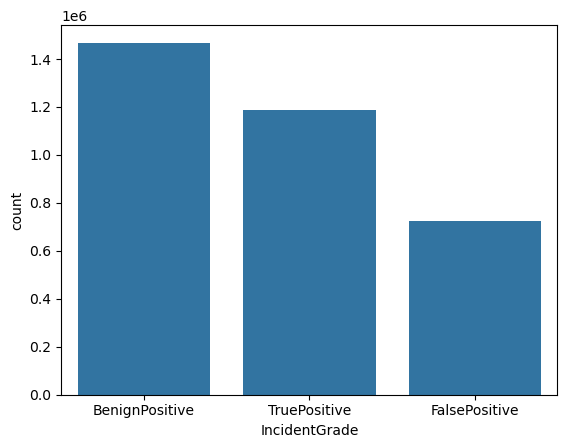

In [26]:
# Visualization

sns.countplot(x='IncidentGrade', data = traindata)
plt.show()

In [28]:
summary_incidentgrade = traindata['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percentage')
summary_incidentgrade['Counts'] = traindata['IncidentGrade'].value_counts()

summary_incidentgrade = summary_incidentgrade.reset_index().rename(columns={'index':  'IncidentGrade'})
print(summary_incidentgrade)

    IncidentGrade  Percentage   Counts
0  BenignPositive   43.397597  1467728
1    TruePositive   35.126280  1187988
2   FalsePositive   21.476123   726333


In [30]:
# checking duplicates
duplicates = traindata[traindata.duplicated()]

print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 82569


In [42]:
# drop null values in 'Incidentgrade'
traindata = traindata.dropna(subset=['IncidentGrade'])

In [44]:
traindata.drop_duplicates(inplace=True)

In [45]:
traindata.shape

(3299973, 35)

In [48]:
traindata.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              1
FolderPath            1
ResourceIdName        1
OSFamily              1
OSVersion             1
CountryCode           1
State                 1
City                  1
dtype: int64

In [52]:
# drop null values in Traindata
traindata = traindata.dropna(subset=['FileName','FolderPath','OSFamily','OSVersion','CountryCode','State','City'])

In [54]:
traindata.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [56]:
traindata.nunique()

Id                     577193
OrgId                    5109
IncidentId             390094
AlertId               1038358
Timestamp              675657
DetectorId               7008
AlertTitle              69756
Category                   20
IncidentGrade               3
EntityType                 31
EvidenceRole                2
DeviceId                45902
Sha256                  59396
IpAddress              159922
Url                     68572
AccountSid             224585
AccountUpn             335094
AccountObjectId        218779
AccountName            230323
DeviceName              66837
NetworkMessageId       211672
RegistryKey               761
RegistryValueName         331
RegistryValueData         400
ApplicationId             770
ApplicationName          1235
OAuthApplicationId        309
FileName               112343
FolderPath              48233
ResourceIdName           1187
OSFamily                    6
OSVersion                  44
CountryCode               204
State     

In [58]:
#converting timestamp to date time
traindata['Timestamp'] = pd.to_datetime(traindata['Timestamp'])

In [59]:
print(traindata['Timestamp'].dtype)

traindata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [60]:
# Extracting Day, Month, Year, Hour and time from Timestamp

traindata['Day'] = traindata['Timestamp'].dt.day
traindata['Month'] = traindata['Timestamp'].dt.month
traindata['Year'] = traindata['Timestamp'].dt.year
traindata['Time'] = traindata['Timestamp'].dt.time
traindata['Weekday'] = traindata['Timestamp'].dt.weekday
traindata['Month end or Not'] = traindata['Timestamp'].dt.is_month_end

In [61]:
traindata.drop('Month end or Not', axis = 1, inplace=True)

In [62]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299972 entries, 0 to 3400344
Data columns (total 40 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   IncidentGrade       object             
 9   EntityType          object             
 10  EvidenceRole        object             
 11  DeviceId            int64              
 12  Sha256              int64              
 13  IpAddress           int64              
 14  Url                 int64              
 15  AccountSid          int64              
 16  AccountUpn          int64              
 17  AccountObjectId     int64       

In [68]:
# Summary statistics for categorical feature
traindata.describe(include=['object'])

,Category,IncidentGrade,EntityType,EvidenceRole,Time
count,3299972,3299972,3299972,3299972,3299972
unique,20,3,31,2,86399
top,InitialAccess,BenignPositive,Ip,Related,01:27:49
freq,1450637,1424935,778100,1801304,4025


In [69]:
traindata['Hour'] = traindata['Timestamp'].dt.hour

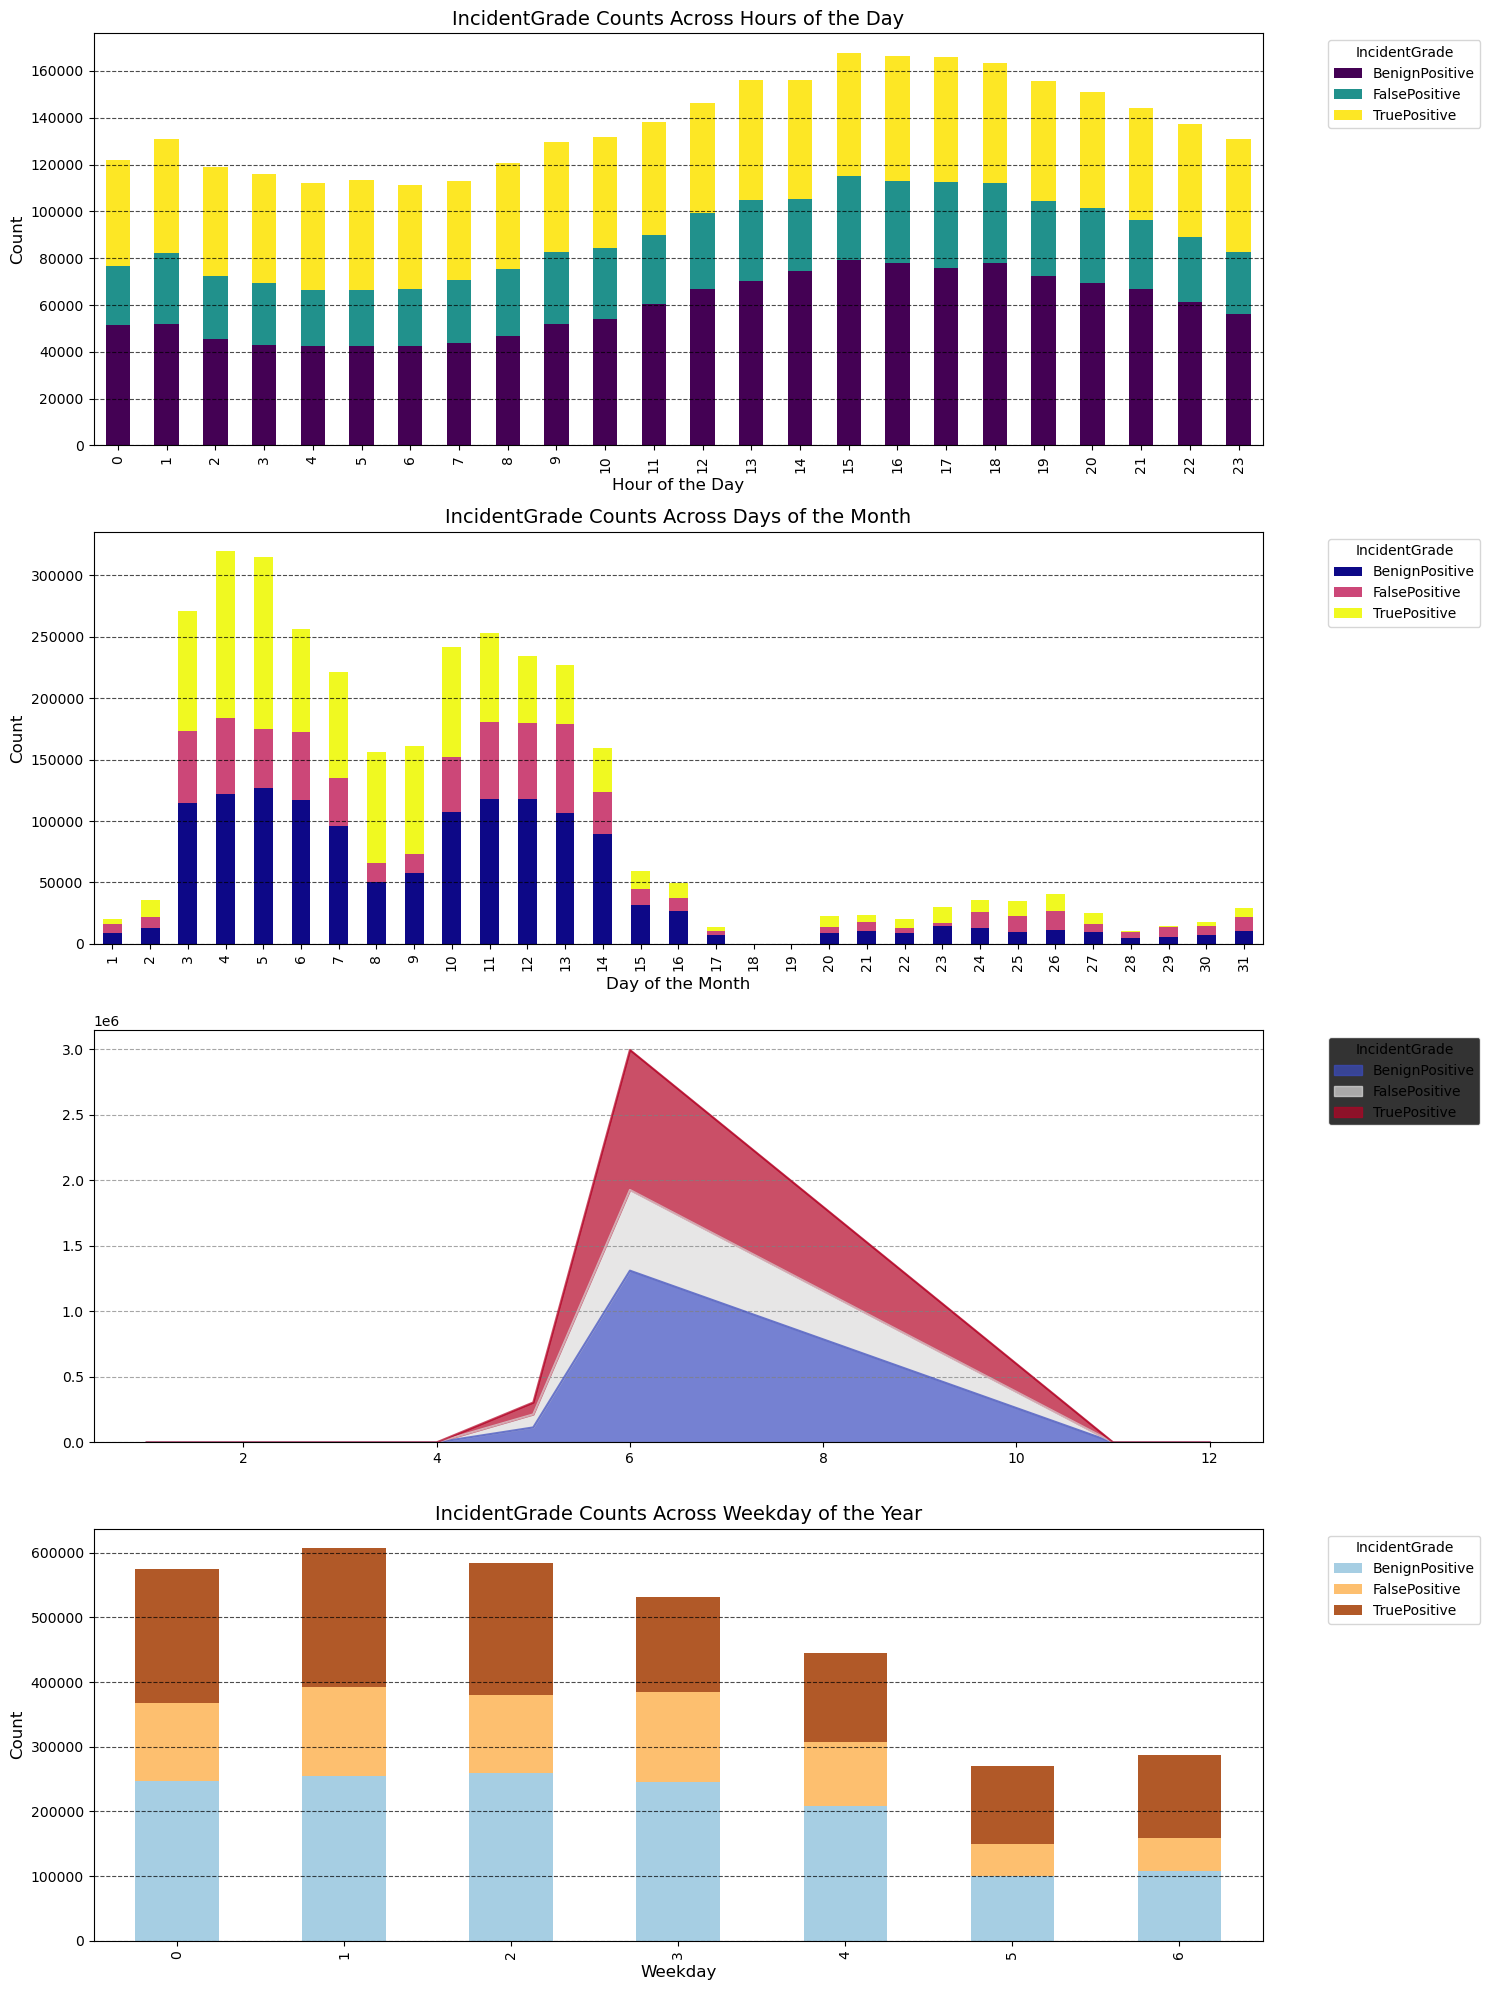

In [70]:
# Aggregate data
hour_incident_grade = traindata.groupby(['Hour', 'IncidentGrade']).size().unstack(fill_value=0)
day_incident_grade = traindata.groupby(['Day', 'IncidentGrade']).size().unstack(fill_value=0)
month_incident_grade = traindata.groupby(['Month', 'IncidentGrade']).size().unstack(fill_value=0)
weekday_incident_grade = traindata.groupby(['Weekday', 'IncidentGrade']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Hourly distribution (stacked bar plot)
hour_incident_grade.plot(kind='bar', stacked=True, ax=axes[0], cmap='viridis')
axes[0].set_title("IncidentGrade Counts Across Hours of the Day", fontsize=14)
axes[0].set_xlabel("Hour of the Day", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Daily distribution (stacked bar plot)
day_incident_grade.plot(kind='bar', stacked=True, ax=axes[1], cmap='plasma')
axes[1].set_title("IncidentGrade Counts Across Days of the Month", fontsize=14)
axes[1].set_xlabel("Day of the Month", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Monthly distribution (area plot)
month_incident_grade.plot(kind='area', ax=axes[2], cmap='coolwarm', alpha=0.7)
axes[2].set_title("IncidentGrade Trends Across Months of the Year", fontsize=14, color='white')
axes[2].set_xlabel("Month", fontsize=12, color='white')
axes[2].set_ylabel("Cumulative Count", fontsize=12, color='white')
axes[2].legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white')
axes[2].grid(axis='y', linestyle='--', alpha=0.7, color='gray')

# Weekday distribution (stacked bar plot)
weekday_incident_grade.plot(kind='bar', stacked=True, ax=axes[3], cmap='Paired')
axes[3].set_title("IncidentGrade Counts Across Weekday of the Year", fontsize=14)
axes[3].set_xlabel("Weekday", fontsize=12)
axes[3].set_ylabel("Count", fontsize=12)
axes[3].legend(title='IncidentGrade', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [71]:
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Time,Weekday,Hour
0,1709396985476,26,18583,687462,2024-06-06 05:56:47+00:00,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132.0,4227.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,6,6,2024,05:56:47,3,5
1,927712939180,33,5065,3990,2024-06-03 10:45:09+00:00,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,3,6,2024,10:45:09,0,10
2,1090921697002,201,150787,807590,2024-06-13 03:36:40+00:00,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,13,6,2024,03:36:40,3,3
3,1434519079555,204,108287,28575,2024-06-08 16:54:57+00:00,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007.0,9177.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,8,6,2024,16:54:57,5,16
4,1005022347708,54,528202,1458226,2024-06-09 02:48:01+00:00,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978.0,114449.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,9,6,2024,02:48:01,6,2


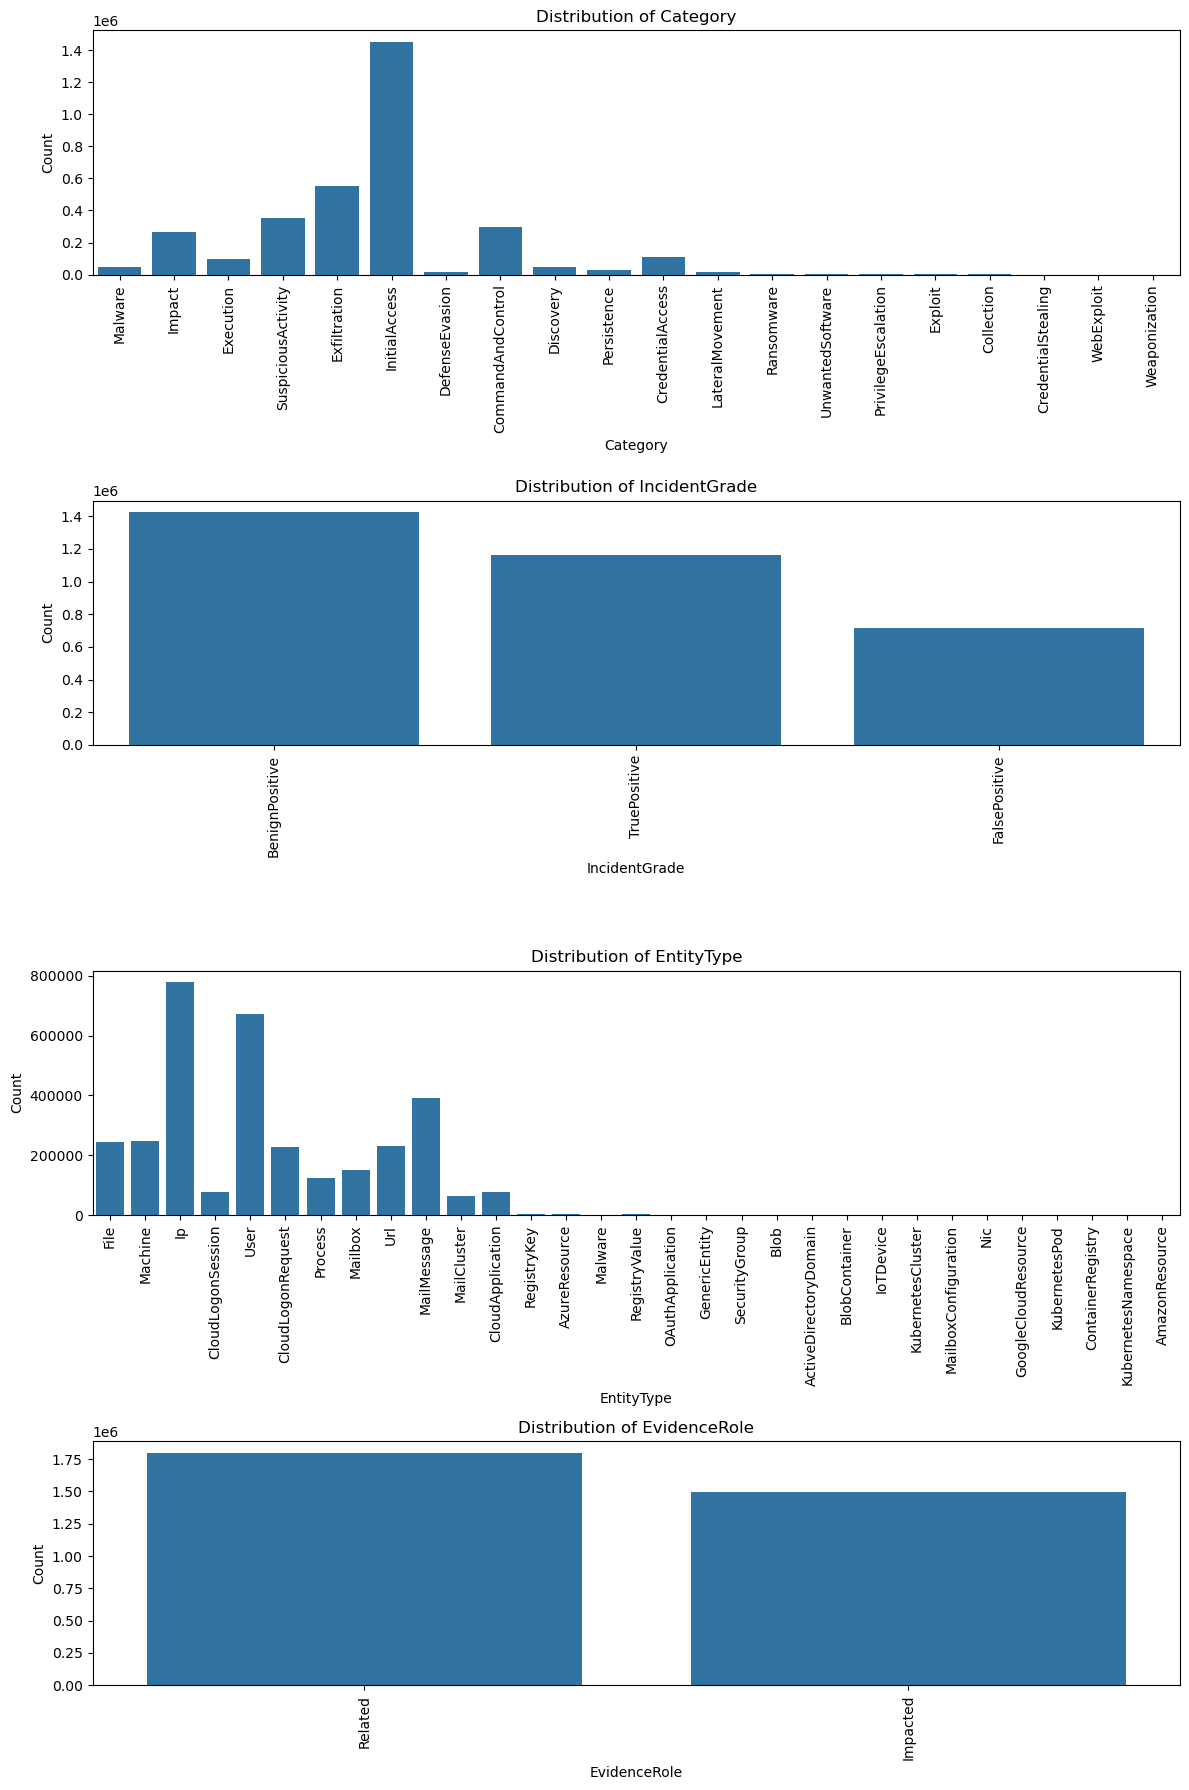

In [76]:
categorical_columns = ['Category', 'IncidentGrade', 'EntityType','EvidenceRole']

# Create subplots for each categorical column
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Plot each column as a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=traindata, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90, color='black')  # Rotate x-axis labels for readability if needed

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [77]:
numeric_columns = traindata.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

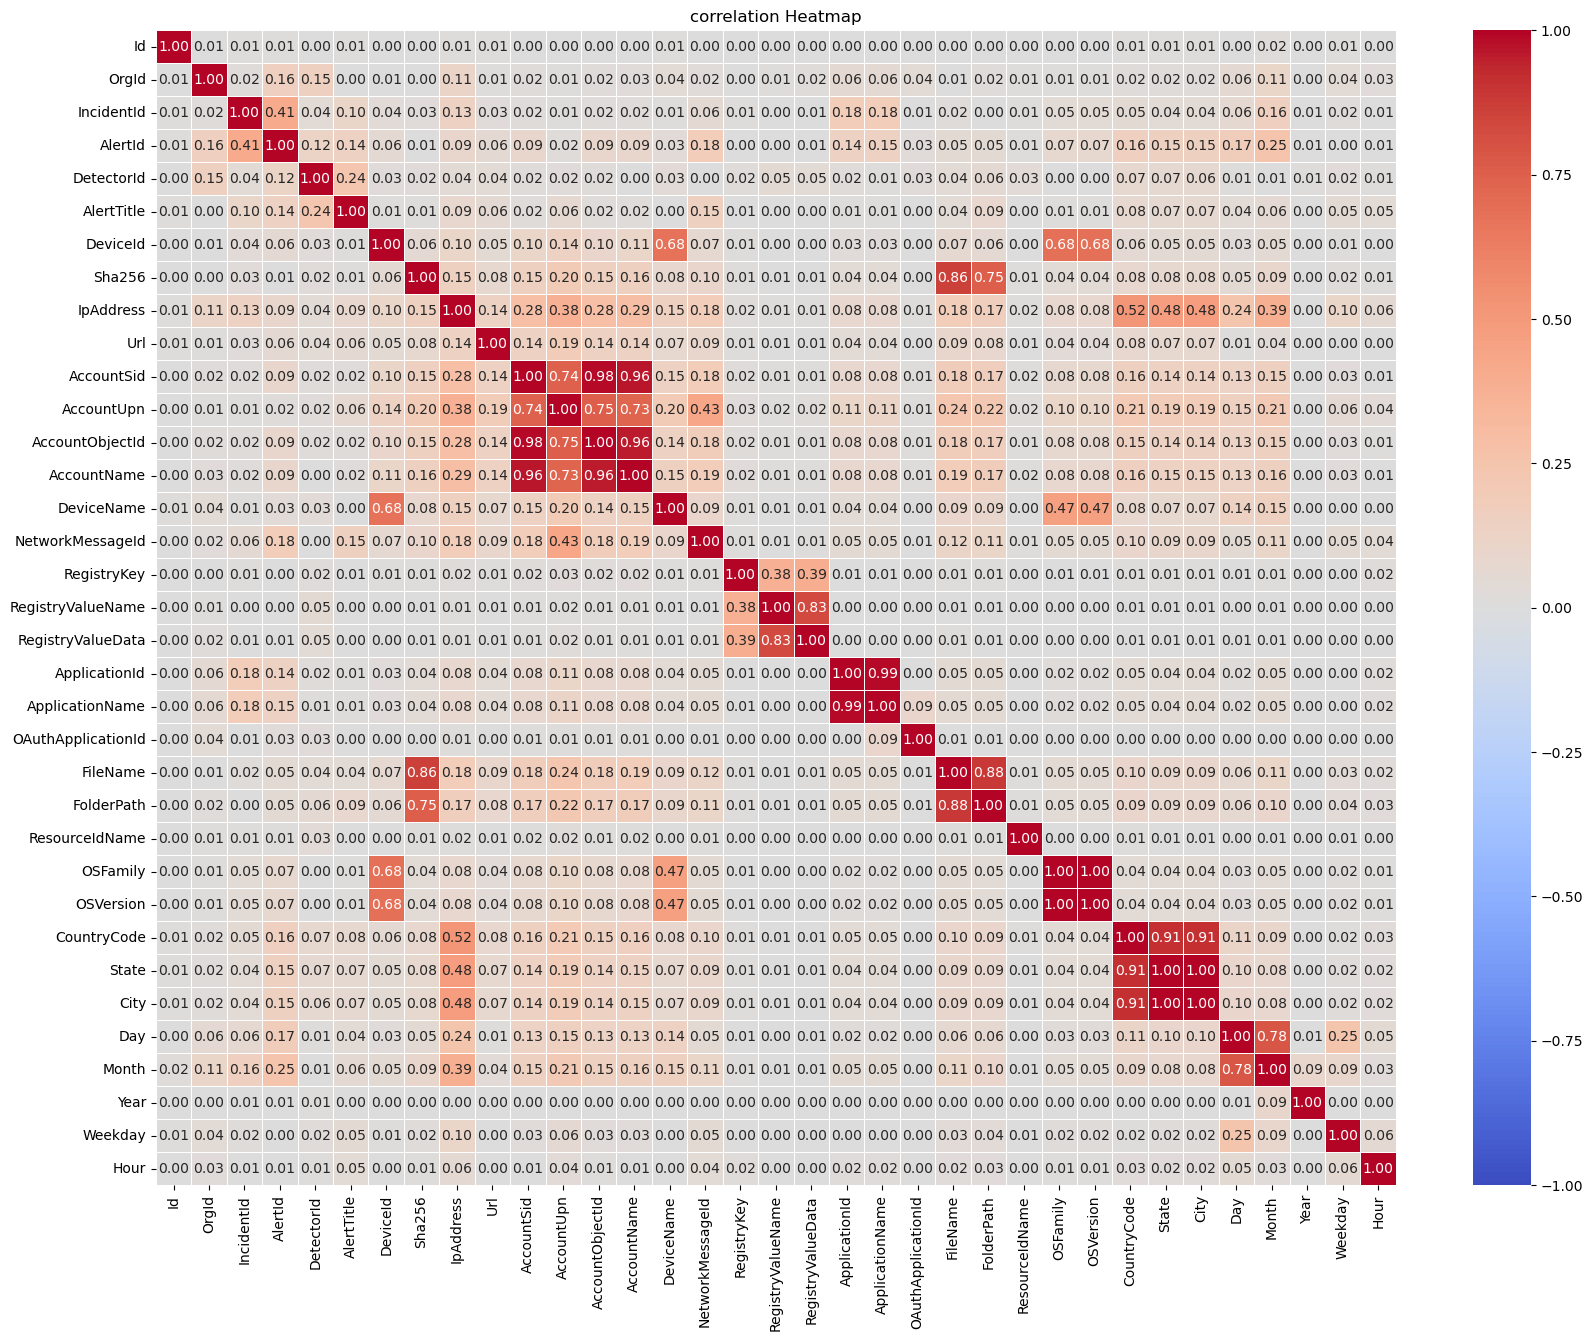

In [78]:
# selecting numerical col
numeric_df=traindata.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [79]:
# Dropping Highly Correlated Columns dropping columns correlated above 65% 
traindata.drop(["Sha256","AccountSid","AccountUpn","AccountObjectId","RegistryValueName","ApplicationId","FolderPath",
                "CountryCode","State","Month", "OSFamily", "DeviceId" ,"Timestamp"], axis =1 , inplace = True)


In [80]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299972 entries, 0 to 3400344
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   IncidentGrade       object 
 8   EntityType          object 
 9   EvidenceRole        object 
 10  IpAddress           int64  
 11  Url                 int64  
 12  AccountName         int64  
 13  DeviceName          int64  
 14  NetworkMessageId    int64  
 15  RegistryKey         int64  
 16  RegistryValueData   int64  
 17  ApplicationName     int64  
 18  OAuthApplicationId  int64  
 19  FileName            float64
 20  ResourceIdName      float64
 21  OSVersion           float64
 22  City                float64
 23  Day                 int32  
 24  Year                int32  
 

In [81]:
# cheking the uique values in columns

columns = traindata.select_dtypes(include=['float64', 'int64','object']).columns

In [82]:
traindata.shape

(3299972, 28)

In [84]:
# Encoding categorical variables

categorical = traindata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    traindata[feature] = encoder.fit_transform(traindata[feature])

traindata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Time,Weekday,Hour
0,1709396985476,26,18583,687462,31,813,12,0,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,4132.0,3586.0,66.0,10630.0,6,2024,21406,3,5
1,927712939180,33,5065,3990,38,25,9,0,17,0,360606,160396,453297,3142,529644,1631,860,3421,881,289573.0,3586.0,66.0,10630.0,3,2024,38708,0,10
2,1090921697002,201,150787,807590,419,444,6,0,17,0,360606,160396,453297,4181,529644,1631,860,3421,881,289573.0,3586.0,66.0,10630.0,13,2024,13000,3,3
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,97007.0,3586.0,66.0,10630.0,8,2024,60896,5,16
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,360606,160396,453297,153085,529644,1631,860,3421,881,39978.0,3586.0,66.0,10630.0,9,2024,10081,6,2


In [95]:
traindata.to_csv('traindata_processed.csv', index=False)

# Test Data

In [98]:
#importing the test data 
testdata = pd.read_csv('GUIDE_Test.csv')

testdata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


In [100]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299972 entries, 0 to 3400344
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            int32  
 7   IncidentGrade       int32  
 8   EntityType          int32  
 9   EvidenceRole        int32  
 10  IpAddress           int64  
 11  Url                 int64  
 12  AccountName         int64  
 13  DeviceName          int64  
 14  NetworkMessageId    int64  
 15  RegistryKey         int64  
 16  RegistryValueData   int64  
 17  ApplicationName     int64  
 18  OAuthApplicationId  int64  
 19  FileName            float64
 20  ResourceIdName      float64
 21  OSVersion           float64
 22  City                float64
 23  Day                 int32  
 24  Year                int32  
 

In [102]:
testdata.shape

(3418177, 46)

In [104]:
testdata.drop_duplicates(inplace=True)

In [106]:
nullsummary = pd.DataFrame({
    'Null Count': testdata.isna().sum(),
    'Null Percentage': (testdata.isna().sum() / len(testdata)) * 100
})

print(nullsummary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        1901573        55.632440
IncidentGrade                0         0.000000
ActionGrouped          3416508        99.953395
ActionGranular         3416508        99.953395
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

In [108]:
testdata.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       1901573
IncidentGrade               0
ActionGrouped         3416508
ActionGranular        3416508
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        3383766
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          3392233
FileName                    0
FolderPath

In [110]:
threshold = len(testdata) * 0.5
testdata = testdata.dropna(thresh =threshold, axis=1)

In [112]:
# checking duplicates
duplicates = testdata[testdata.duplicated()]

print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 160402


In [114]:
testdata.drop_duplicates(inplace=True)

In [116]:
testdata.shape

(3257699, 36)

In [128]:
testdata.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           1
State                 1
City                  1
Usage                 1
dtype: int64

In [126]:
testdata.dropna(subset=['CountryCode','State','City','Usage'])

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418171,231928234560,93,10,0,2024-06-11T22:02:45.000Z,27,18,Discovery,FalsePositive,User,Impacted,98799,138268,360606,160396,190677,673934,425863,209297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public
3418172,1219770712647,42,3,206063,2024-06-03T15:48:41.000Z,43,28,Malware,BenignPositive,Process,Related,98799,52,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,30,36,3586,5,66,242.0,1445.0,10630.0,Public
3418173,369367188212,279,1002,272,2024-06-07T22:06:03.000Z,27,18,Discovery,BenignPositive,Machine,Related,98799,138268,360606,160396,441377,673934,425863,453297,129004,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public
3418174,1279900256743,5,172,1207279,2024-06-04T00:45:14.000Z,0,0,InitialAccess,TruePositive,Ip,Related,98799,138268,306,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,3.0,5.0,33.0,Public


In [130]:
# Converting Timestamp to date time

testdata['Timestamp'] = pd.to_datetime(testdata['Timestamp'])

In [132]:
print(testdata['Timestamp'].dtype)

testdata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [134]:
# Extracting Day, Month, Year, Hour and Time from Timestamp

testdata["Day"] = testdata["Timestamp"].dt.day
testdata["Month"] = testdata["Timestamp"].dt.month
testdata["Year"] = testdata["Timestamp"].dt.year
testdata["Hour"] = testdata["Timestamp"].dt.hour
testdata["Time"] = testdata["Timestamp"].dt.time
testdata['Weekday'] = testdata['Timestamp'].dt.weekday

testdata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time,Weekday
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Private,4,6,2024,22,22:56:27,1
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242.0,1445.0,10630.0,Public,3,6,2024,12,12:58:26,0
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242.0,1445.0,10630.0,Public,8,6,2024,3,03:20:49,5
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public,12,6,2024,12,12:07:31,2
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242.0,1445.0,10630.0,Public,6,6,2024,17,17:42:05,3


In [138]:
testdata.drop(["Sha256","AccountSid","AccountUpn","AccountObjectId","RegistryValueName","ApplicationId","FolderPath",
                "CountryCode","State","Month", "OSFamily", "DeviceId" ,"Timestamp"], axis =1 , inplace = True)

In [140]:
testdata.drop('Usage',axis=1,inplace=True)

In [144]:
testdata.shape

(3257699, 28)

In [146]:
testdata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time,Weekday
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630.0,4,2024,22,22:56:27,1
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630.0,3,2024,12,12:58:26,0
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630.0,8,2024,3,03:20:49,5
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630.0,12,2024,12,12:07:31,2
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630.0,6,2024,17,17:42:05,3


In [ ]:
testdata.dtypes

In [ ]:
# Encoding categorical variables of testdata

categorical = testdata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    testdata[feature] = encoder.fit_transform(testdata[feature])

testdata.head()

In [ ]:
testdata.to_csv('testdata_processed.csv', index=False)